In [8]:
import pandas as pd

Data = pd.read_csv('Data Sets/1-16_2-220.csv',delimiter = ',')

# DataExample = DataExample.iloc[:, [2,4,5,6,9,16]]

Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa)
0,24913.25846,9.999678,65.047618,869.999763,29.999812,863.731042,73.451975,68.245183,63.253939,62.894247,28.119090,93.998113,4.861652,15.444801,-0.001982,13.805580,22.067031,85.387626
1,25213.01717,9.999678,65.017242,869.999763,29.999812,864.149205,73.407226,68.260700,63.213386,62.928659,28.046466,93.366174,4.879199,15.442808,-0.001982,13.772528,22.106993,85.391299
2,25512.85017,9.999678,64.926118,869.999763,29.999812,867.123291,73.439453,68.124091,63.190254,62.895534,28.190392,93.369530,4.946817,15.652034,-0.001982,13.748150,21.912614,85.391699
3,25813.07591,9.999678,65.067432,869.999763,29.999812,861.960970,73.379910,67.964313,63.027161,62.710468,28.060051,93.516388,5.274661,15.279413,-0.001982,13.681767,22.056327,85.382400
4,26113.51246,9.999678,65.057734,869.999763,29.999812,861.904904,73.337777,68.014349,63.079509,62.872910,28.138379,93.560484,5.326707,15.446793,-0.001982,13.701816,22.187577,85.383646


# Finding Steady State

In [9]:
import numpy as np

botComp = 'Approx Distillate Comp (Wt% CH3OH)'
distComp = 'Approx Bottoms Comp (Wt% CH3OH)'
λ1 = 0.2
λ2 = λ1
λ3 = 0.1
Rbot = np.zeros(len(Data[botComp]))
Rdist = np.zeros(len(Data[distComp]))


Data[botComp]
Data[distComp]

# Xfbot = λ1*Data[botComp]

def GetR(Xi,Xi_1=0,Xf_1=0,ν2fi_1=0,δ2fi_1=0):
    
    
    
    Xf = λ1*Xi + (1-λ1)*Xf_1
    ν2fi = λ2*(Xi - Xf_1)**2 + (1-λ2)*ν2fi_1
    δ2fi = λ3*(Xi - Xi_1)**2 + (1-λ3)*δ2fi_1
    R = ((2-λ1)*ν2fi)/δ2fi
    return [R,Xf,ν2fi,δ2fi]


myVals = GetR(Data[botComp][0])
Rbot[0] = myVals[0]
for i in range(1,len(Data[botComp])):
    myVals = GetR(Data[botComp][i],Data[botComp][i-1],myVals[1],myVals[2],myVals[3])
    Rbot[i] = myVals[0]

myVals = GetR(Data[distComp][0])
Rdist[0] = myVals[0]
for i in range(1,len(Data[distComp])):
    myVals = GetR(Data[distComp][i],Data[distComp][i-1],myVals[1],myVals[2],myVals[3])
    Rdist[i] = myVals[0]    
    
# print(Rbot)
# print()
# print(Rdist)

Data['R Distillate'] = Rdist
Data['R Bottoms'] = Rbot
Data

,Time (sec),Feed Flowrate (ml/min),Feed Temperature (C),Reboiler Duty (w),Reflux Flowrate (ml/min),Reboiler Pressure (mbar),Reboiler Temperature (C),Tray 11 Temperature (C),Tray 4 Temperature (C),Overhead Vapor Temperature (C),Reflux Temperature (C),Approx Distillate Comp (Wt% CH3OH),Approx Bottoms Comp (Wt% CH3OH),Feed Heater Output (%),Bottoms Pump Output (%),Feed Tank Weight Kg,Ambient Temperature (C),Ambient Pressure (kPa),R Distillate,R Bottoms
0,24913.25846,9.999678,65.047618,869.999763,29.999812,863.731042,73.451975,68.245183,63.253939,62.894247,28.119090,93.998113,4.861652,15.444801,-0.001982,13.805580,22.067031,85.387626,3.600000,3.600000
1,25213.01717,9.999678,65.017242,869.999763,29.999812,864.149205,73.407226,68.260700,63.213386,62.928659,28.046466,93.366174,4.879199,15.442808,-0.001982,13.772528,22.106993,85.391299,5.783068,5.716867
2,25512.85017,9.999678,64.926118,869.999763,29.999812,867.123291,73.439453,68.124091,63.190254,62.895534,28.190392,93.369530,4.946817,15.652034,-0.001982,13.748150,21.912614,85.391699,7.056040,6.871748
3,25813.07591,9.999678,65.067432,869.999763,29.999812,861.960970,73.379910,67.964313,63.027161,62.710468,28.060051,93.516388,5.274661,15.279413,-0.001982,13.681767,22.056327,85.382400,7.957754,7.388993
4,26113.51246,9.999678,65.057734,869.999763,29.999812,861.904904,73.337777,68.014349,63.079509,62.872910,28.138379,93.560484,5.326707,15.446793,-0.001982,13.701816,22.187577,85.383646,8.354470,7.480876


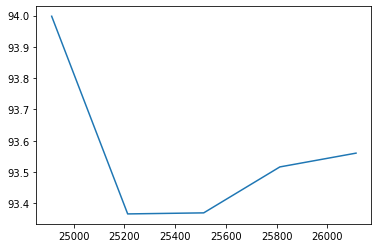

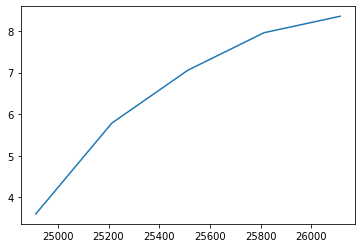

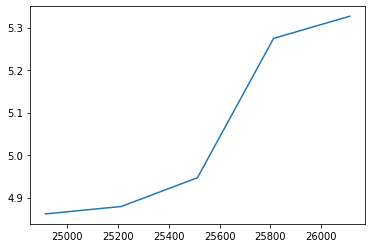

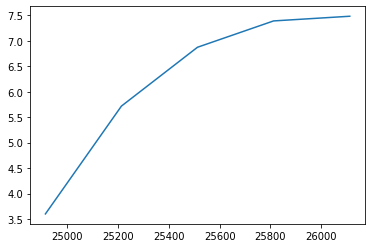

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(Data['Time (sec)'],Data['Approx Distillate Comp (Wt% CH3OH)'])

plt.figure(2)
plt.plot(Data['Time (sec)'],Data['R Distillate'])

plt.figure(3)
plt.plot(Data['Time (sec)'],Data['Approx Bottoms Comp (Wt% CH3OH)'])

plt.figure(4)
plt.plot(Data['Time (sec)'],Data['R Bottoms'])